# Fuzzy logic introduction
## Installation: 
* pip install -U scikit-fuzzy
* pip install networkx==1.3
    * networkx==2.0 has drastical changes in the code

## Tasks:
* Make the tip recommendation system more interactive with annotator
* Make more fine grained levels, i.e. (bad,descent,great) -> (poor,bad,average,descent,great) and add rules for them
* Add new Antecednets variable: interior, quota and add rules for them


# The Tipping Problem
Taking the tipping example full circle, if we were to create a controller which estimates the tip we should give at a restaurant, we might structure it as such:

## Antecednets (Inputs)
* service
    * Universe (ie, crisp value range): How good was the service of the waitress, on a scale of 1 to 10?
    * Fuzzy set (ie, fuzzy value range): poor, acceptable, amazing
* food quality
    * Universe: How tasty was the food, on a scale of 1 to 10?
    * Fuzzy set: bad, decent, great

## Consequents (Outputs)
* tip
    * Universe: How much should we tip, on a scale of 0% to 25%
    * Fuzzy set: low, medium, high
* Rules
    * IF the service was good or the food quality was good, THEN the tip will be high.
    * IF the service was average, THEN the tip will be medium.
    * IF the service was poor and the food quality was poor THEN the tip will be low.
* Usage
    * If I tell this controller that I rated:
        * the service as 9.8, and
        * the quality as 6.5,
    * it would recommend I leave:
        * a 20.2% tip.

In [69]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# New Antecedent/Consequent objects hold universe variables and membership
# functions
quality = ctrl.Antecedent(np.arange(0, 11, 1), 'quality')
service = ctrl.Antecedent(np.arange(0, 11, 1), 'service')
interior = ctrl.Antecedent(np.arange(0, 11, 1), 'interior')
quota = ctrl.Antecedent(np.arange(0, 11, 1), 'quota')
tip = ctrl.Consequent(np.arange(0, 101, 1), 'tip')

# Auto-membership function population is possible with .automf(3, 5, or 7)
quality.automf(3)
service.automf(3)
interior.automf(3)
quota.automf(3)

# Custom membership functions can be built interactively with a familiar,
# Pythonic API
tip['poor'] = fuzz.trimf(tip.universe, [0, 0, 25])
tip['bad'] = fuzz.trimf(tip.universe, [0, 25, 50])
tip['average'] = fuzz.trimf(tip.universe, [25, 50, 75])
tip['descent'] = fuzz.trimf(tip.universe, [50, 75, 100])
tip['great'] = fuzz.trimf(tip.universe, [75, 100, 100])

D:\3-year\MV\setup\lib\site-packages\matplotlib\figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


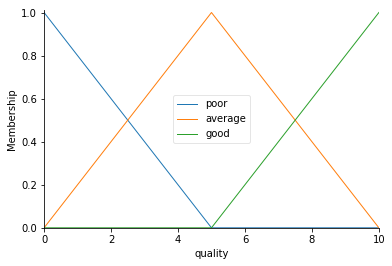

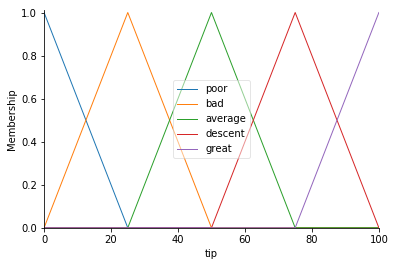

In [70]:
# You can see how these look with .view()
%matplotlib inline
quality.view()
tip.view()
# service.view()
# interior.view()
# quota.view()

In [71]:
rule1 = ctrl.Rule(quality['poor'] & service['poor'] & interior['poor'] & quota['poor'], tip['poor'])
rule2 = ctrl.Rule(quality['average'] & service['average'] & interior['average'] & quota['average'], tip['average'])
rule3 = ctrl.Rule(quality['good'] & service['good'] & interior['good'] & quota['good'], tip['great'])
rule4 = ctrl.Rule(quality['good'] & service['average'] & interior['good'] & quota['poor'], tip['descent'])
rule5 = ctrl.Rule(quality['good'] & service['good'] & interior['poor'] & quota['poor'], tip['bad'])
rule6 = ctrl.Rule(quality['good'] & service['poor'] & interior['poor'] & quota['good'], tip['average'])
rule7 = ctrl.Rule(quality['average'] & service['good'] & interior['good'] & quota['poor'], tip['descent'])
rule8 = ctrl.Rule(quality['poor'] & service['average'] & interior['average'] & quota['average'], tip['bad'])
rule9 = ctrl.Rule(quality['good'] & service['good'] & interior['good'] & quota['average'], tip['descent'])
rule10 = ctrl.Rule(quality['average'] & service['poor'] & interior['good'] & quota['good'], tip['bad'])
rule11 = ctrl.Rule(quality['good'] & service['good'] & interior['average'] & quota['average'], tip['descent'])
rule12 = ctrl.Rule(quality['good'] & quota['poor'] & interior['average'] | quality['average'] & quota['good'] & interior['average'], tip['descent'])

In [72]:
tipping_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12])
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)

In [73]:
tipping.input['quality'] = 9.0
tipping.input['service'] = 5.5
tipping.input['interior'] = 9.3
tipping.input['quota'] = 2.1

# Crunch the numbers
tipping.compute()

Recommended tip 69.8025523968


D:\3-year\MV\setup\lib\site-packages\matplotlib\figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


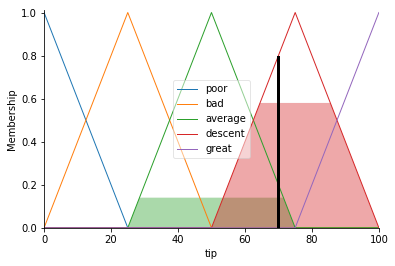

In [74]:
print('Recommended tip',tipping.output['tip'])
tip.view(sim=tipping)

In [78]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

@interact
def calculate_tip(quality=(0,9), service=(0,9), interior=(0,9), quota=(0,9)):
    tipping.input['quality'] = quality
    tipping.input['service'] = service
    tipping.input['interior'] = interior
    tipping.input['quota'] = quota
    tipping.compute()
    print('Recommended tip',tipping.output['tip'])
    tip.view(sim=tipping)

A Jupyter Widget